---
# CNN handwriting digit exercise

---
The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. MNIST digits dataset (*)


&nbsp; a) Start visualizing some of the sample images from keras.datasets.mnist

&nbsp; b) Normalize the images to values between 0 and 1 

&nbsp; c) Build a Convolutional Neural Network to classify the images.

&nbsp; d) Compare the results against a Logistic classifier and/or a KNN, as well as a MLP neural network.

<details>

<summary>Hint</summary>
A CNN is a stack of Convolutional layers and MaxPooling layers. Suitable filter sizes for three conv-layers are 32, 64 and 128. There should be a MaxPooling2D layer between each. The output layer should be a Dense layer with 10 nodes. The input layer should have shape (28,28,1) for the images. 
</details>

<details>

<summary>Answer</summary>
<pre>
import keras
from keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
</pre>
</details>

---

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import functions as f

# Load autoreload extension
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

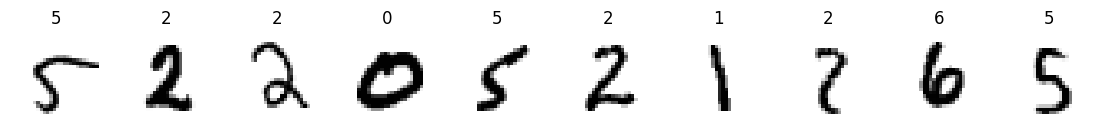

In [123]:
#image_range = range(10)
#image_range = [12,34,45,67,78,89,90,123,234,345]
image_range = random.sample(range(0, X_train.shape[0]), 10)

# funktion för att plotta 10 images i en range av images:
def plot_image(X_train, y_train, image_range):
    fig, axes = plt.subplots(1, 10, figsize=(14, 1.3))
    for ax, idx in zip(axes, image_range):
        ax.set_axis_off()
        ax.set_title(int(y_train[idx]))
        ax.imshow(X_train[idx], cmap=plt.cm.binary)

plot_image(X_train, y_train, image_range)

Flatten:

In [124]:
#X_train = X_train.reshape(60000, 28*28) # använder reshape för att göra om till en vektor
#X_test = X_test.reshape(10000, 28*28) # använder reshape för att göra om till en vektor
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

Normaliserar:

In [125]:
X_train = X_train.astype('float32') / 255 # konverterar till float och normaliserar
X_test = X_test.astype('float32') / 255 # konverterar till float och normaliserar
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Definierar modellen:

In [126]:
from keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs) # 32 filters, 3x3 kernel => 32 nya matriser
x = layers.MaxPooling2D(pool_size=2)(x) # 2x2 pooling (minskar antalet pixlar med hälften)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x) # 64 filters, 3x3 kernel => 64 nya matriser
x = layers.MaxPooling2D(pool_size=2)(x) # 2x2 pooling (minskar antalet pixlar med hälften)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x) # 128 filters, 3x3 kernel => 128 nya matriser
x = layers.Flatten()(x) # plattar till matriserna
outputs = layers.Dense(10, activation="softmax")(x) # 10 outputs, softmax för att få sannolikheter
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Tränar modellen:

In [ ]:
early_stopping = EarlyStopping(monitor="val_loss", patience=2)

model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

In [ ]:
f.plot_metrics_2(model.history.history)

AttributeError: module 'functions' has no attribute 'plot_metrics_2'